In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## cars dataset

In [8]:
df1=pd.read_csv('latest_global_cars.csv')

In [9]:
df1.head(25)

,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,price
0,land-rover,Range,12.0,Diesel,2017,Automatique,0,490000.0
1,land-rover,Range,12.0,Diesel,2016,Automatique,0,355000.0
2,bmw,X5,8.0,Diesel,2016,Automatique,0,260000.0
3,land-rover,Range,8.0,Diesel,2018,Automatique,0,310000.0
4,mercedes,Classe,8.0,Diesel,2022,Automatique,0,820000.0
5,mercedes,Classe,8.0,Diesel,2019,Automatique,0,355000.0
6,hyundai,Santa,9.0,Diesel,2020,Automatique,0,285000.0
7,mercedes,Gle,12.0,Diesel,2018,Automatique,0,339000.0
8,alfa-romeo,Stelvio,9.0,Diesel,2019,Automatique,0,275000.0
9,jeep,Renegade,6.0,Diesel,2022,Automatique,0,257000.0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24564 entries, 0 to 24563
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             24564 non-null  object 
 1   model              24564 non-null  object 
 2   Puissance fiscale  24564 non-null  float64
 3   Carburant          24564 non-null  object 
 4   Année              24564 non-null  int64  
 5   Boite de vitesses  24564 non-null  object 
 6   etat               24564 non-null  int64  
 7   price              24564 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.5+ MB


In [13]:
df1['car_id'] = range(1, len(df1) + 1)
new_order = ["car_id","marque", "model", "Puissance fiscale", "Carburant", "Année", "Boite de vitesses","etat","price"]
df1 = df1[new_order]
df1.head()

,car_id,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,price
0,1,land-rover,Range,12.0,Diesel,2017,Automatique,0,490000.0
1,2,land-rover,Range,12.0,Diesel,2016,Automatique,0,355000.0
2,3,bmw,X5,8.0,Diesel,2016,Automatique,0,260000.0
3,4,land-rover,Range,8.0,Diesel,2018,Automatique,0,310000.0
4,5,mercedes,Classe,8.0,Diesel,2022,Automatique,0,820000.0


## user dataset

In [17]:
import pandas as pd
import random

random.seed(42)
total_rows = len(df1)
young_users = int(len(df1)/5)

# Generate 'user_id' values
user_ids = range(1, total_rows + 1)

ages = []

# Generate random ages for users
for user_id in user_ids:
    if user_id <= young_users:
        age = random.randint(18, 25)
    else:
        age = random.randint(26, 50)
    ages.append(age)
    
random.shuffle(ages)
# Create a DataFrame
df2 = pd.DataFrame({'user_id': user_ids, 'age': ages})

# Display the DataFrame
df2.head()


,user_id,age
0,1,18
1,2,46
2,3,42
3,4,27
4,5,24


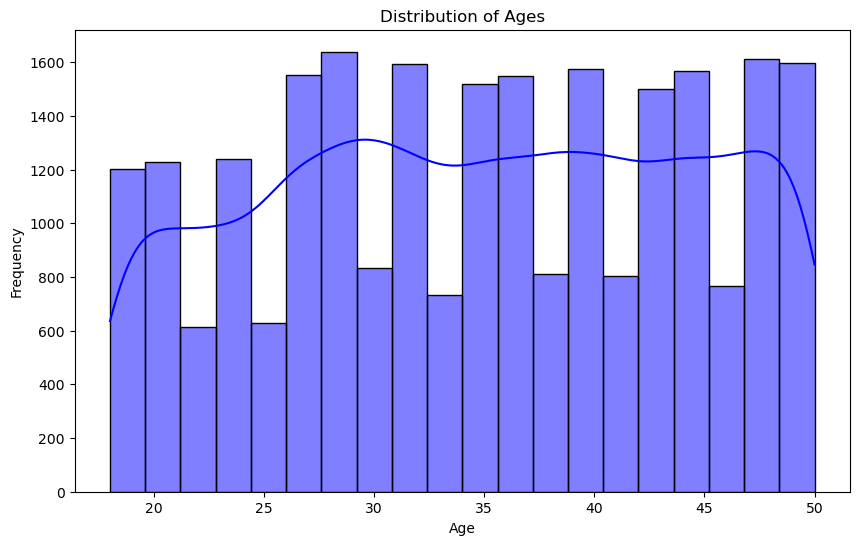

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['age'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

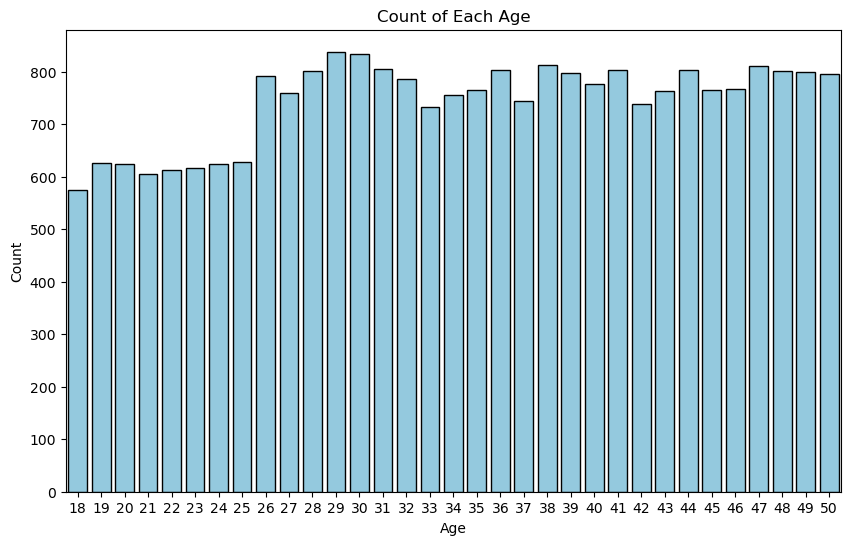

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='age', color='skyblue', edgecolor='black')
plt.title('Count of Each Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

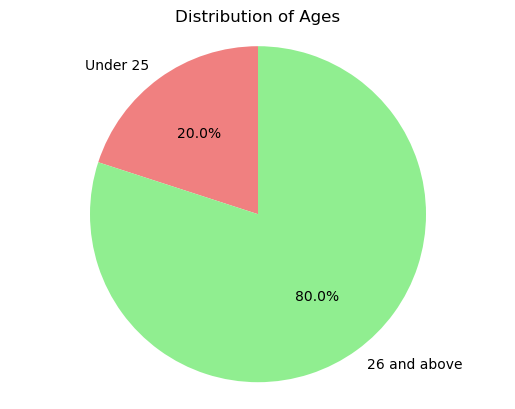

In [25]:
under_25 = len(df2[df2['age'] <= 25])
above_25 = len(df2[df2['age'] > 25])

# Create a pie chart
labels = ['Under 25', '26 and above']
sizes = [under_25, above_25]
colors = ['lightcoral', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ages')
plt.show()

## global dataset

In [52]:
df = pd.concat([df2, df1], axis=1)
df.head()

,user_id,age,car_id,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,price
0,1,18,1,land-rover,Range,12.0,Diesel,2017,Automatique,0,490000.0
1,2,46,2,land-rover,Range,12.0,Diesel,2016,Automatique,0,355000.0
2,3,42,3,bmw,X5,8.0,Diesel,2016,Automatique,0,260000.0
3,4,27,4,land-rover,Range,8.0,Diesel,2018,Automatique,0,310000.0
4,5,24,5,mercedes,Classe,8.0,Diesel,2022,Automatique,0,820000.0


In [53]:
import json

# Specify the file path
json_file_path = 'marque_price_dict.json'

# Read the dictionary from the JSON file
with open(json_file_path, 'r') as json_file:
    marque_price_dict = json.load(json_file)

# Print the loaded dictionary
print(marque_price_dict)

{'abarth': 205894.77777777778, 'alfa-romeo': 173196.4757709251, 'audi': 298662.1974206349, 'autre': 250000.0, 'bentley': 800000.0, 'bmw': 292582.5388994307, 'byd': 50000.0, 'cadillac': 826666.6666666666, 'chana': 37250.0, 'changhe': 27500.0, 'chery': 90780.48780487805, 'chevrolet': 92900.70921985815, 'chrysler': 184250.0, 'citroen': 99915.15463917526, 'cupra': 436666.6666666667, 'dacia': 103346.18175765646, 'daewoo': 30125.0, 'daihatsu': 45671.875, 'dfsk': 131516.12903225806, 'dodge': 131562.375, 'ds': 240978.0, 'faw': 46666.666666666664, 'ferrari': 3900000.0, 'fiat': 100327.95750708216, 'ford': 130968.8793939394, 'foton': 50000.0, 'gaz': 205000.0, 'geely': 267700.0, 'gmc': 923333.3333333334, 'gme': 40000.0, 'great-wall': 69000.0, 'gwm': 470000.0, 'hafei': 49200.0, 'honda': 87456.98511166254, 'hummer': 195000.0, 'hyundai': 156206.64280442803, 'infiniti': 80000.0, 'isuzu': 135464.2857142857, 'iveco': 252071.42857142858, 'jaguar': 313309.31677018636, 'jeep': 229262.37293729372, 'kia': 12

In [54]:
premium_dict = {}
standard_dict = {}
basic_dict = {}
obligatoire_dict = {}

# Iterate through the original dictionary
for marque, price in marque_price_dict.items():
    if price >= 400000:
        premium_dict[marque] = price
    elif 200000 <= price < 400000:
        standard_dict[marque] = price
    elif 100000 <= price < 200000:
        basic_dict[marque] = price
    elif 0 <= price < 100000:
        obligatoire_dict[marque] = price

# Print or use the categorized dictionaries as needed
print("Premium:", premium_dict)
print("Standard:", standard_dict)
print("Basic:", basic_dict)
print("Obligatoire:", obligatoire_dict)

Premium: {'bentley': 800000.0, 'cadillac': 826666.6666666666, 'cupra': 436666.6666666667, 'ferrari': 3900000.0, 'gmc': 923333.3333333334, 'gwm': 470000.0, 'lexus': 516173.07692307694, 'porsche': 841067.729032258, 'tesla': 550000.0}
Standard: {'abarth': 205894.77777777778, 'audi': 298662.1974206349, 'autre': 250000.0, 'bmw': 292582.5388994307, 'ds': 240978.0, 'gaz': 205000.0, 'geely': 267700.0, 'iveco': 252071.42857142858, 'jaguar': 313309.31677018636, 'jeep': 229262.37293729372, 'land-rover': 379790.3396226415, 'maserati': 390357.14285714284, 'mercedes': 245573.52729955732, 'triumph': 290000.0, 'volvo': 223048.90760869565}
Basic: {'alfa-romeo': 173196.4757709251, 'chrysler': 184250.0, 'dacia': 103346.18175765646, 'dfsk': 131516.12903225806, 'dodge': 131562.375, 'fiat': 100327.95750708216, 'ford': 130968.8793939394, 'hummer': 195000.0, 'hyundai': 156206.64280442803, 'isuzu': 135464.2857142857, 'kia': 127300.95534290271, 'mahindra': 173250.0, 'mini': 160900.00763358778, 'mitsubishi': 133

In [55]:
def determine_assurance(row):
    if row['age'] <= 25:
        return 'Jeune'
    elif row['marque'] in premium_dict:
        return 'luxe'
    elif row['marque'] in standard_dict:
        return 'Premium'
    elif row['marque'] in basic_dict:
        return 'Standard'
    elif row['marque'] in obligatoire_dict:
        return 'Obligatoire'
    else:
        return None

# Apply the function to create the 'assurance' column
df['assurance'] = df.apply(determine_assurance, axis=1)

# Display the updated DataFrame
df.head()

,user_id,age,car_id,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,price,assurance
0,1,18,1,land-rover,Range,12.0,Diesel,2017,Automatique,0,490000.0,Jeune
1,2,46,2,land-rover,Range,12.0,Diesel,2016,Automatique,0,355000.0,Premium
2,3,42,3,bmw,X5,8.0,Diesel,2016,Automatique,0,260000.0,Premium
3,4,27,4,land-rover,Range,8.0,Diesel,2018,Automatique,0,310000.0,Premium
4,5,24,5,mercedes,Classe,8.0,Diesel,2022,Automatique,0,820000.0,Jeune


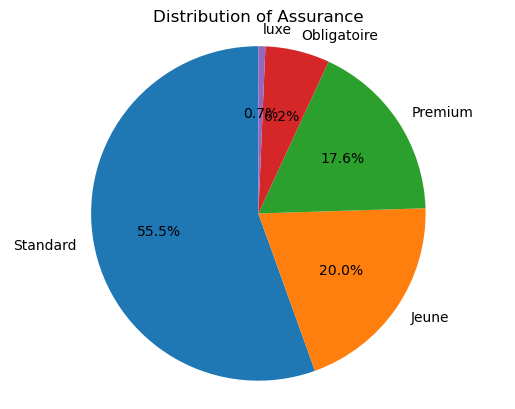

In [56]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'assurance'
assurance_counts = df['assurance'].value_counts()

# Plot the counts using a pie chart
plt.pie(assurance_counts, labels=assurance_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Assurance')
plt.show()


## Classification model

In [57]:
columns_to_remove = ['user_id', 'car_id','price']
df = df.drop(columns_to_remove, axis=1)

,age,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,assurance
0,18,land-rover,Range,12.0,Diesel,2017,Automatique,0,Jeune
1,46,land-rover,Range,12.0,Diesel,2016,Automatique,0,Premium
2,42,bmw,X5,8.0,Diesel,2016,Automatique,0,Premium
3,27,land-rover,Range,8.0,Diesel,2018,Automatique,0,Premium
4,24,mercedes,Classe,8.0,Diesel,2022,Automatique,0,Jeune


In [61]:
df.head()

,age,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,assurance
0,18,land-rover,Range,12.0,Diesel,2017,Automatique,0,Jeune
1,46,land-rover,Range,12.0,Diesel,2016,Automatique,0,Premium
2,42,bmw,X5,8.0,Diesel,2016,Automatique,0,Premium
3,27,land-rover,Range,8.0,Diesel,2018,Automatique,0,Premium
4,24,mercedes,Classe,8.0,Diesel,2022,Automatique,0,Jeune


In [60]:
df['Puissance fiscale'].unique()

array([12.,  8.,  9.,  6., 30., 11., 10.,  7., 14., 13.,  5., 31., 37.,
       16., 23., 17., 36., 35., 18.,  4., 28., 21.,  2., 41., 25.,  3.,
       15., 20., 19., 29., 40., 24., 27., 50., 22., 32., 34., 26., 60.,
       33., 55., 49., 52., 42., 47.,  0.])

In [63]:
df.drop(df[df['Puissance fiscale'] == 0].index, inplace=True)

In [64]:
df['Puissance fiscale'].unique()

array([12.,  8.,  9.,  6., 30., 11., 10.,  7., 14., 13.,  5., 31., 37.,
       16., 23., 17., 36., 35., 18.,  4., 28., 21.,  2., 41., 25.,  3.,
       15., 20., 19., 29., 40., 24., 27., 50., 22., 32., 34., 26., 60.,
       33., 55., 49., 52., 42., 47.])

In [65]:
zero_counts = df['Puissance fiscale'].value_counts().get(0, 0)

print(f"Number of occurrences of 0 in 'Puissance fiscale': {zero_counts}")

Number of occurrences of 0 in 'Puissance fiscale': 0


In [66]:
from sklearn import preprocessing

In [67]:
label_encoder = preprocessing.LabelEncoder()
df['marque']= label_encoder.fit_transform(df['marque'])
df['model']= label_encoder.fit_transform(df['model'])
df['Carburant']= label_encoder.fit_transform(df['Carburant'])
df['Boite de vitesses']= label_encoder.fit_transform(df['Boite de vitesses'])
df['assurance']= label_encoder.fit_transform(df['assurance'])

In [68]:
df.head()

,age,marque,model,Puissance fiscale,Carburant,Année,Boite de vitesses,etat,assurance
0,18,44,413,12.0,0,2017,0,0,0
1,46,44,413,12.0,0,2016,0,0,2
2,42,5,530,8.0,0,2016,0,0,2
3,27,44,413,8.0,0,2018,0,0,2
4,24,50,163,8.0,0,2022,0,0,0


age                     AxesSubplot(0.125,0.53;0.352273x0.35)
marque               AxesSubplot(0.547727,0.53;0.352273x0.35)
model                   AxesSubplot(0.125,0.11;0.352273x0.35)
Boite de vitesses    AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

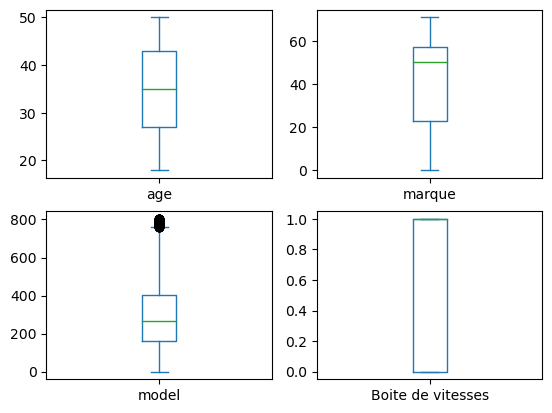

In [69]:
df[['age','marque','model','Boite de vitesses']].plot(kind='box', subplots=True,layout=(2,2), sharex=False,sharey=False)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
array = df.values
X = array[:,0:8]
y = array[:,8]

In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [92]:
X

array([[-1.79696494,  0.11053242,  0.78331465, ...,  0.6818246 ,
        -1.41585644, -0.19906219],
       [ 1.21651957,  0.11053242,  0.78331465, ...,  0.53561683,
        -1.41585644, -0.19906219],
       [ 0.78602178, -1.72421537,  1.49921753, ...,  0.53561683,
        -1.41585644, -0.19906219],
       ...,
       [ 1.00127067,  1.33369762,  3.11458815, ...,  1.12044788,
        -1.41585644,  5.02355562],
       [ 1.53939291,  1.33369762,  3.12070698, ...,  0.6818246 ,
        -1.41585644,  5.02355562],
       [-0.82834492,  1.33369762,  3.12070698, ...,  0.6818246 ,
        -1.41585644,  5.02355562]])

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [111]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.06820032573289903 at K = 1


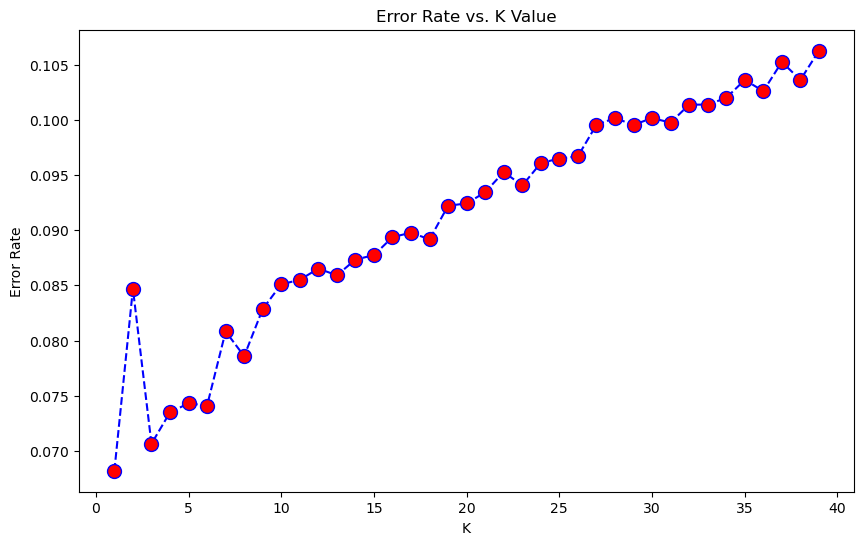

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [113]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.931799674267101 at K = 1


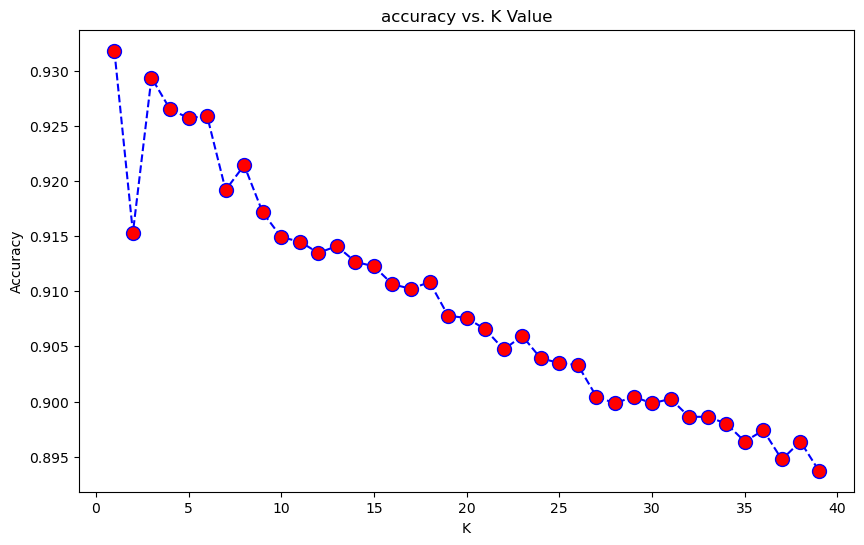

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
y_pred_proba=KNN.predict_proba(X_test)[:, 1]

In [116]:
joblib_file = "KNN_model.pkl"   
joblib.dump(KNN, joblib_file)

['KNN_model.pkl']

In [117]:
print("Classification Accuracy : ",accuracy_score(y_test, y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Accuracy :  0.931799674267101
Confusion Matrix : 
[[ 924    8   12   49    1]
 [   9  244    9   32    0]
 [  15    7  843   54    3]
 [  46   17   60 2545    1]
 [   0    3    5    4   21]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       994
         1.0       0.87      0.83      0.85       294
         2.0       0.91      0.91      0.91       922
         3.0       0.95      0.95      0.95      2669
         4.0       0.81      0.64      0.71        33

    accuracy                           0.93      4912
   macro avg       0.89      0.85      0.87      4912
weighted avg       0.93      0.93      0.93      4912



In [118]:
inverse_encoded_values = label_encoder.inverse_transform(df['assurance'])